In [1]:
%pip install matplotlib_inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib_inline.backend_inline import set_matplotlib_formats

import plotly.express as px
import plotly.io as pio
from collections import Counter 


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
student_df = pd.read_csv('student_df.csv')
student_df.head(20)

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,Walc,health,absences,G1,G2,G3,absences %,absences_category,average_grade,grade_category
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,1,3,6,25,30,30,3.33,Average,28.33,very low
1,F,17,U,GT3,T,1,1,at_home,other,course,...,1,3,4,25,25,30,2.22,Low,26.67,very low
2,F,15,U,LE3,T,1,1,at_home,other,other,...,3,3,10,35,40,50,5.56,Average,41.67,low
3,F,15,U,GT3,T,4,2,health,services,home,...,1,5,2,75,70,75,1.11,Zero,73.33,high
4,F,16,U,GT3,T,3,3,other,other,home,...,2,5,4,30,50,50,2.22,Low,43.33,low
5,M,16,U,LE3,T,4,3,services,other,reputation,...,2,5,10,75,75,75,5.56,Average,75.00,high
6,M,16,U,LE3,T,2,2,other,other,home,...,1,3,0,60,60,55,0.00,Zero,58.33,average
7,F,17,U,GT3,A,4,4,other,teacher,home,...,1,1,6,30,25,30,3.33,Average,28.33,very low
8,M,15,U,LE3,A,3,2,services,other,home,...,1,1,0,80,90,95,0.00,Zero,88.33,high
9,M,15,U,GT3,T,3,4,other,other,home,...,1,5,0,70,75,75,0.00,Zero,73.33,high


In [3]:
student_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,absences %,average_grade
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,16.646154,2.751282,2.533333,1.451282,2.041026,0.312821,3.930769,3.217949,3.102564,1.464103,2.282051,3.558974,5.694872,54.512821,53.525641,52.012821,3.163282,53.350615
std,1.201081,1.095532,1.088697,0.699935,0.838262,0.713145,0.894328,0.991577,1.115326,0.864908,1.277625,1.390515,8.026097,16.542959,18.788995,22.916801,4.459211,18.456103
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,15.000000,0.000000,0.000000,0.000000,6.670000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,40.000000,45.000000,40.000000,0.000000,41.670000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,55.000000,55.000000,55.000000,2.220000,53.330000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,65.000000,65.000000,68.750000,4.440000,66.670000
max,19.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,95.000000,95.000000,100.000000,41.670000,96.670000


In [4]:
student_df['age'].value_counts()

age
16    104
17     98
18     82
15     82
19     24
Name: count, dtype: int64

In [5]:
age_counts = Counter(student_df['age'])
unique_ages = list(age_counts.keys())
counts = list(age_counts.values())

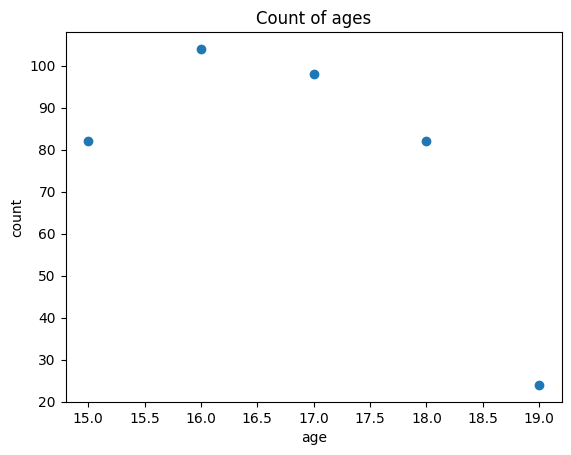

In [6]:
counts = list(age_counts.values())

plt.scatter(unique_ages, counts)

plt.xlabel('age')

plt.ylabel('count')

plt.title('Count of ages')

plt.show()

In [7]:
student_df['absences'].describe()

count    390.000000
mean       5.694872
std        8.026097
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

In [8]:
absences_count = Counter(student_df['absences'])
unique_absences = list(absences_count.keys())
counts = list(absences_count.values())

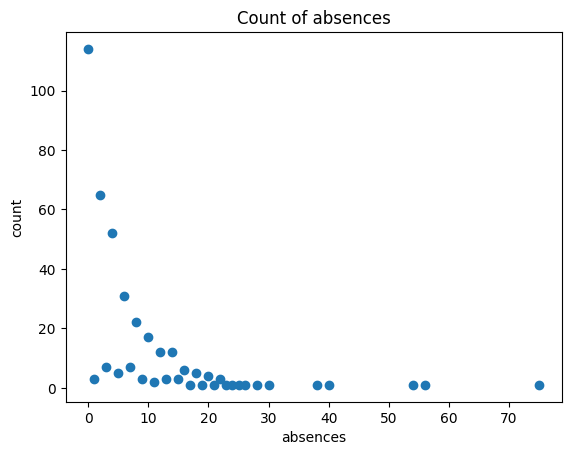

In [9]:
counts = list(absences_count.values())

plt.scatter(unique_absences, counts)

plt.xlabel('absences')

plt.ylabel('count')

plt.title('Count of absences')

plt.show()

In [10]:
#Statistics for absences 
absences = student_df['absences'] 

# Calculating statistics
mean = np.mean(absences)
median = np.median(absences)
std_dev = np.std(absences)

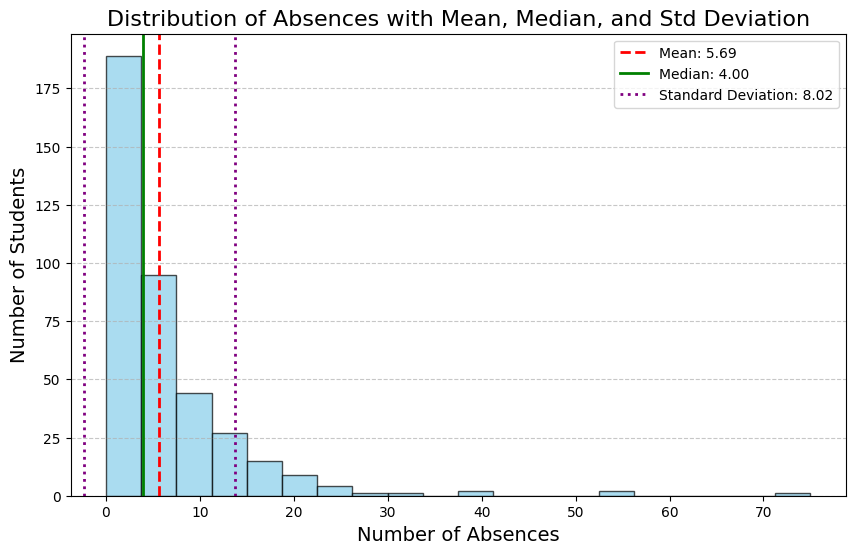

In [11]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(absences, bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Add vertical lines for mean, median, and standard deviation
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle='solid', linewidth=2, label=f'Median: {median:.2f}')
plt.axvline(mean + std_dev, color='purple', linestyle='dotted', linewidth=2, label=f'Standard Deviation: {std_dev:.2f}')
plt.axvline(mean - std_dev, color='purple', linestyle='dotted', linewidth=2)

# Titles and labels
plt.title('Distribution of Absences with Mean, Median, and Std Deviation', fontsize=16)
plt.xlabel('Number of Absences', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)


plt.legend()

# Grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

## Exploring Grades

In [12]:
student_df['G1'].describe()

count    390.000000
mean      54.512821
std       16.542959
min       15.000000
25%       40.000000
50%       55.000000
75%       65.000000
max       95.000000
Name: G1, dtype: float64

In [13]:
student_df['G2'].describe()

count    390.000000
mean      53.525641
std       18.788995
min        0.000000
25%       45.000000
50%       55.000000
75%       65.000000
max       95.000000
Name: G2, dtype: float64

In [14]:
student_df['G3'].describe()

count    390.000000
mean      52.012821
std       22.916801
min        0.000000
25%       40.000000
50%       55.000000
75%       68.750000
max      100.000000
Name: G3, dtype: float64

## Create Feature: 'average_grade' by combining semesters 1,2 and 3 and getting average 

In [15]:
student_df['average_grade'].describe()

count    390.000000
mean      53.350615
std       18.456103
min        6.670000
25%       41.670000
50%       53.330000
75%       66.670000
max       96.670000
Name: average_grade, dtype: float64

## Visualizing Distribution of grades

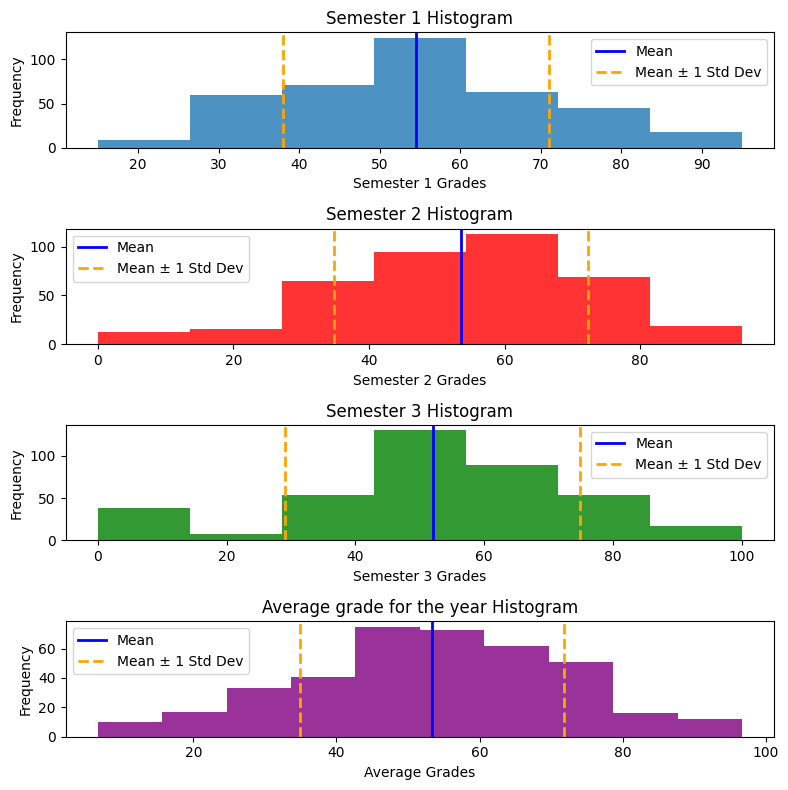

In [16]:
fig, axs = plt.subplots(4, 1, figsize=(8, 8))

# Mean and standard deviation calculations
mean_G1 = np.mean(student_df['G1'])
std_G1 = np.std(student_df['G1'])

mean_G2 = np.mean(student_df['G2'])
std_G2 = np.std(student_df['G2'])

mean_G3 = np.mean(student_df['G3'])
std_G3 = np.std(student_df['G3'])

mean_all = np.mean(student_df['average_grade'])
std_all = np.std(student_df['average_grade'])

# Semester 1 histo
axs[0].hist(student_df['G1'], bins=7, alpha=0.8)
axs[0].set_xlabel('Semester 1 Grades')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Semester 1 Histogram')

# Adding mean and standard deviation lines to Semester 1
axs[0].axvline(mean_G1, color='blue', linestyle='solid', linewidth=2, label='Mean')
axs[0].axvline(mean_G1 + std_G1, color='orange', linestyle='dashed', linewidth=2, label='Mean ± 1 Std Dev')
axs[0].axvline(mean_G1 - std_G1, color='orange', linestyle='dashed', linewidth=2)

# Semester 2 histo
axs[1].hist(student_df['G2'], bins=7, alpha=0.8, color='red')
axs[1].set_xlabel('Semester 2 Grades')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Semester 2 Histogram')

# Adding mean and standard deviation lines to Semester 2
axs[1].axvline(mean_G2, color='blue', linestyle='solid', linewidth=2, label='Mean')
axs[1].axvline(mean_G2 + std_G2, color='orange', linestyle='dashed', linewidth=2, label='Mean ± 1 Std Dev')
axs[1].axvline(mean_G2 - std_G2, color='orange', linestyle='dashed', linewidth=2)

# Semester 3 histo
axs[2].hist(student_df['G3'], bins=7, alpha=0.8, color='green')
axs[2].set_xlabel('Semester 3 Grades')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Semester 3 Histogram')

# Adding mean and standard deviation lines to Semester 3
axs[2].axvline(mean_G3, color='blue', linestyle='solid', linewidth=2, label='Mean')
axs[2].axvline(mean_G3 + std_G3, color='orange', linestyle='dashed', linewidth=2, label='Mean ± 1 Std Dev')
axs[2].axvline(mean_G3 - std_G3, color='orange', linestyle='dashed', linewidth=2)


# avaerage grade histo
axs[3].hist(student_df['average_grade'], bins=10, alpha=.8, color='purple')

axs[3].set_xlabel('Average Grades')
axs[3].set_ylabel('Frequency')
axs[3].set_title('Average grade for the year Histogram')

axs[3].axvline(mean_all, color='blue', linestyle='solid', linewidth=2, label='Mean')
axs[3].axvline(mean_all + std_all, color='orange', linestyle='dashed', linewidth=2, label='Mean ± 1 Std Dev')
axs[3].axvline(mean_all - std_all, color='orange', linestyle='dashed', linewidth=2)

# legend for each subplot
for ax in axs:
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

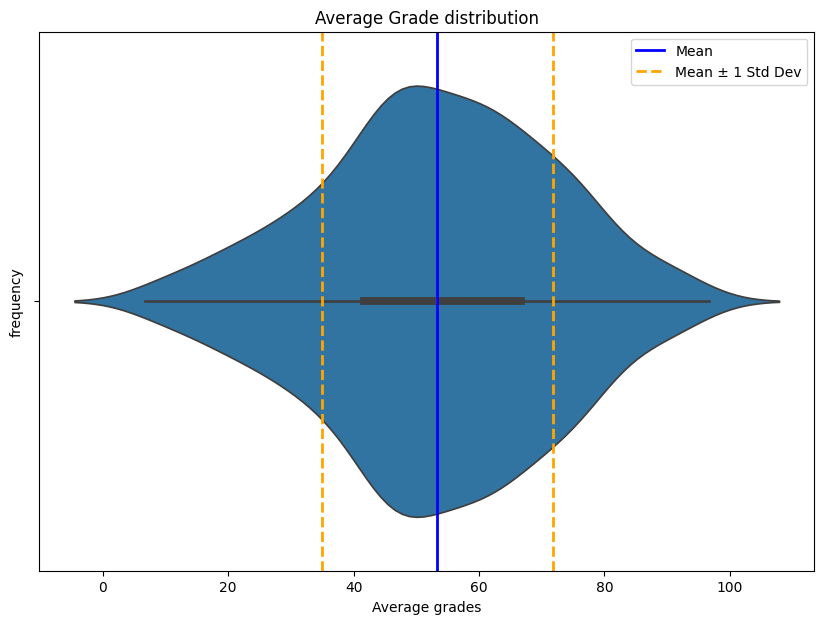

In [17]:
fig, ax = plt.subplots(figsize=(10,7))

sns.violinplot(x='average_grade', data=student_df, ax=ax)

#Lable axis

ax.set_xlabel('Average grades')
ax.set_ylabel('frequency')
ax.set_title('Average Grade distribution')

ax.axvline(mean_all, color='blue', linestyle='solid', linewidth=2, label='Mean')
ax.axvline(mean_all + std_all, color='orange', linestyle='dashed', linewidth=2, label='Mean ± 1 Std Dev')
ax.axvline(mean_all - std_all, color='orange', linestyle='dashed', linewidth=2)

ax.legend()
plt.show()

## Creating classification feature based on percentile that student grades fall into.
'very low' will be below 20th percentile

'low' will be between 20th and 40th percentile.

'average' will be between 40th and 60th percentile.

'high' will be between 60th and 8th percentile.

'very high' will be above 80th percentile.

In [18]:
#using pandas.qcut to assign categories

#labels = ['very low', 'low', 'average', 'high', 'very high']
#student_df['grade_category'] = pd.qcut(df['average_grade'], 
#                                       q=[0,0.2, 0.4, 0.6, 0.8, .99], 
 #                                      labels=labels)

# View the data
print(student_df[['average_grade', 'grade_category']].head())

   average_grade grade_category
0          28.33       very low
1          26.67       very low
2          41.67            low
3          73.33           high
4          43.33            low


In [19]:
print(student_df[['average_grade', 'grade_category']].tail())

     average_grade grade_category
385          40.00            low
386          18.33       very low
387          76.67           high
388          55.00        average
389          43.33            low


In [20]:
student_df['average_grade'].describe()

count    390.000000
mean      53.350615
std       18.456103
min        6.670000
25%       41.670000
50%       53.330000
75%       66.670000
max       96.670000
Name: average_grade, dtype: float64

In [21]:
student_df['grade_category'].value_counts()

grade_category
low         132
average     127
very low     68
high         63
Name: count, dtype: int64

## EDA: Family influence and average grades

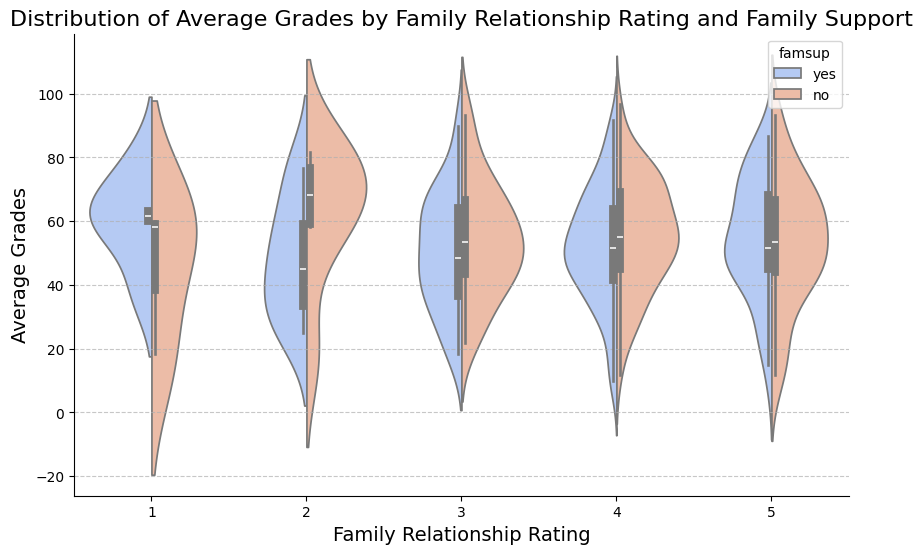

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.violinplot(data=student_df, x='famrel', y='average_grade', hue='famsup', split=True, palette='coolwarm')

# Add labels and title
plt.title('Distribution of Average Grades by Family Relationship Rating and Family Support', fontsize=16)
plt.xlabel('Family Relationship Rating', fontsize=14)
plt.ylabel('Average Grades', fontsize=14)

sns.despine()

# Grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Family support and Average Study Time

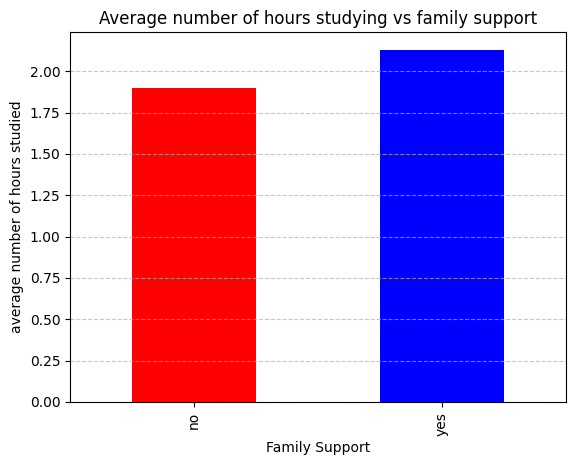

In [23]:
grouped_data = student_df.groupby('famsup')['studytime'].mean()

grouped_data.plot(kind='bar', color=['red','blue'])



plt.title('Average number of hours studying vs family support')

plt.xlabel('Family Support')

plt.ylabel('average number of hours studied')

plt.grid(axis='y', linestyle='--', alpha=0.7)



plt.show()

## EDA: Average grades and Study time

/var/folders/yw/y4pg_jgd1337cpj1cjwrm82c0000gn/T/ipykernel_43401/437822363.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=student_df, x='studytime', y='average_grade', palette='Set1')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


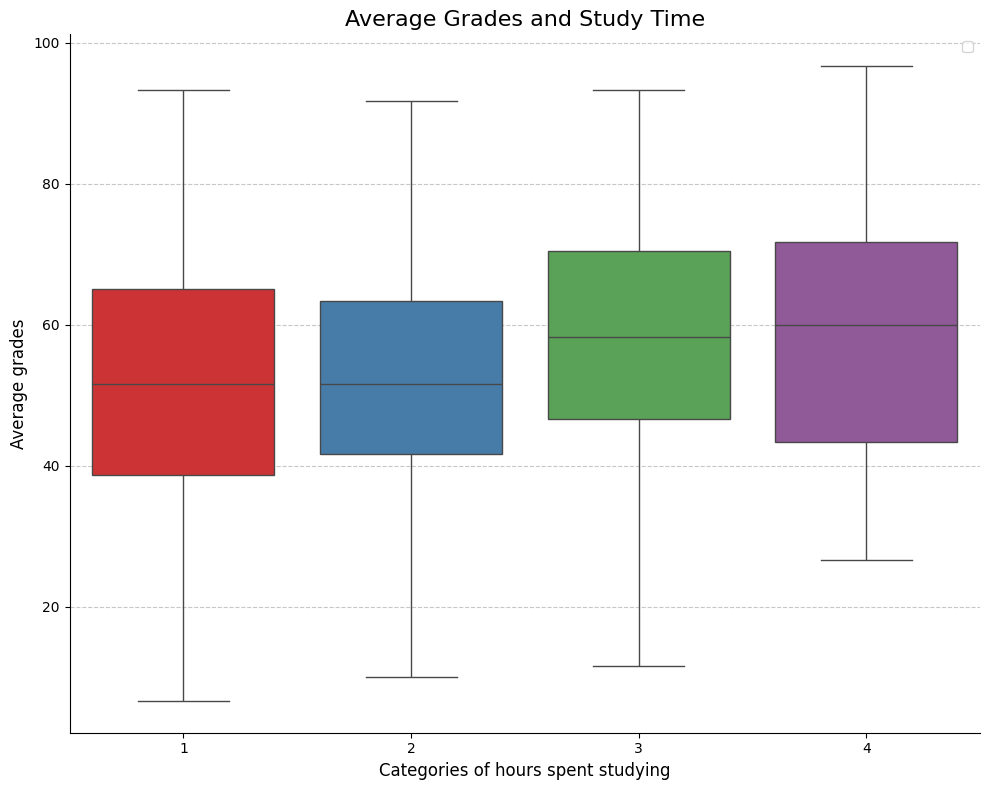

In [24]:
plt.figure(figsize=(10, 8))

sns.boxplot(data=student_df, x='studytime', y='average_grade', palette='Set1')
plt.xlabel('Categories of hours spent studying', fontsize=12)
plt.ylabel('Average grades', fontsize=12)
plt.legend(fontsize=12)
plt.title('Average Grades and Study Time', fontsize=16)

sns.despine()
# Grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend()
plt.show()

## Observations on boxplots:

There is clear evidence that student who studied more earned higher grades on average. 

In [25]:
student_study = student_df.groupby('studytime')[['G1', 'G2', 'G3']].mean()

print(student_study)

                  G1         G2         G3
studytime                                 
1          52.107843  51.225490  50.098039
2          53.299492  52.563452  50.888325
3          60.000000  57.343750  56.718750
4          59.444444  60.185185  56.296296


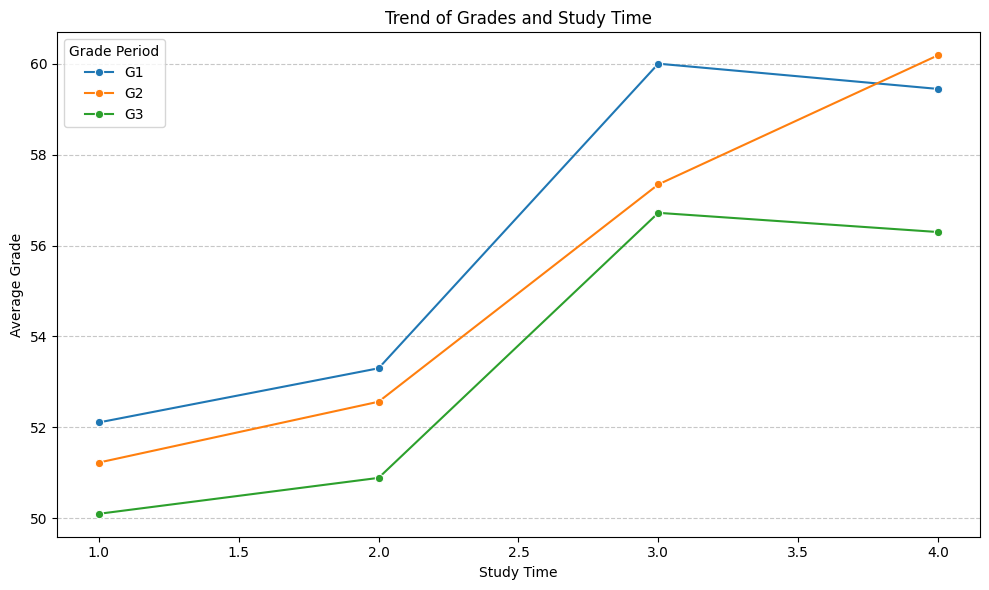

In [26]:
# Reset index to make 'studytime' a column
student_study_reset = student_study.reset_index()


plt.figure(figsize=(10, 6))

# line plot
sns.lineplot(data=student_study_reset.melt(id_vars='studytime', var_name='grade_period', value_name='grade'), 
             x='studytime', y='grade', hue='grade_period', marker='o')


plt.xlabel('Study Time')
plt.ylabel('Average Grade')
plt.title('Trend of Grades and Study Time')
plt.legend(title='Grade Period')

# Grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Observations:

There appears to be a clear link between study time and average grades earned. As students who spend more time studying tend to earn better grades, however there for semesters 1 and 3 there appears to be diminishing returns as students in category 3 earned higher grades than those who studied more in category 4. 

In [27]:
student_df['absences'].value_counts().sort_values(ascending=False)

absences
0     114
2      65
4      52
6      31
8      22
10     17
14     12
12     12
7       7
3       7
16      6
5       5
18      5
20      4
15      3
1       3
22      3
13      3
9       3
11      2
21      1
25      1
54      1
26      1
56      1
24      1
28      1
75      1
19      1
23      1
40      1
30      1
38      1
17      1
Name: count, dtype: int64

## EDA: Average grades and Absences



In [28]:
student_df['absences'].describe()

count    390.000000
mean       5.694872
std        8.026097
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

In [29]:
student_df['absences'].value_counts().sort_values(ascending=False)

absences
0     114
2      65
4      52
6      31
8      22
10     17
14     12
12     12
7       7
3       7
16      6
5       5
18      5
20      4
15      3
1       3
22      3
13      3
9       3
11      2
21      1
25      1
54      1
26      1
56      1
24      1
28      1
75      1
19      1
23      1
40      1
30      1
38      1
17      1
Name: count, dtype: int64

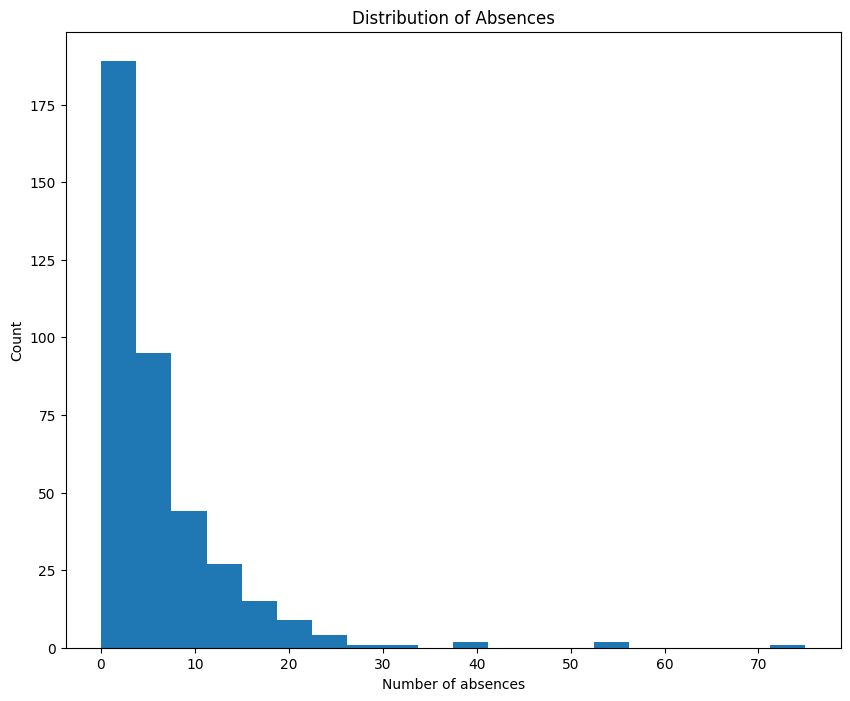

In [30]:

plt.figure(figsize=(10,8))
plt.hist(student_df['absences'], bins=20)

plt.xlabel('Number of absences')
plt.ylabel('Count')

plt.title('Distribution of Absences')

plt.show()

In [31]:
#using pandas.qcut to automatically assign categories based on absences

#labels = ['None', 'Low', 'Average', 'High']
#df['absences_category'] = pd.qcut(df['absences'], 
#                                       q=5, 
 #                                      labels=labels, duplicates="drop") # This helps to fix a value error since there many 0 for absences. This tells pd.qcut to drop duplicate bin edges and adjust the quantiles. 

# View the data
#print(df[['average_grade', 'absences_category']].head())

/var/folders/yw/y4pg_jgd1337cpj1cjwrm82c0000gn/T/ipykernel_43401/2009291023.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=student_df, x='absences_category', y='average_grade', palette='Set1')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


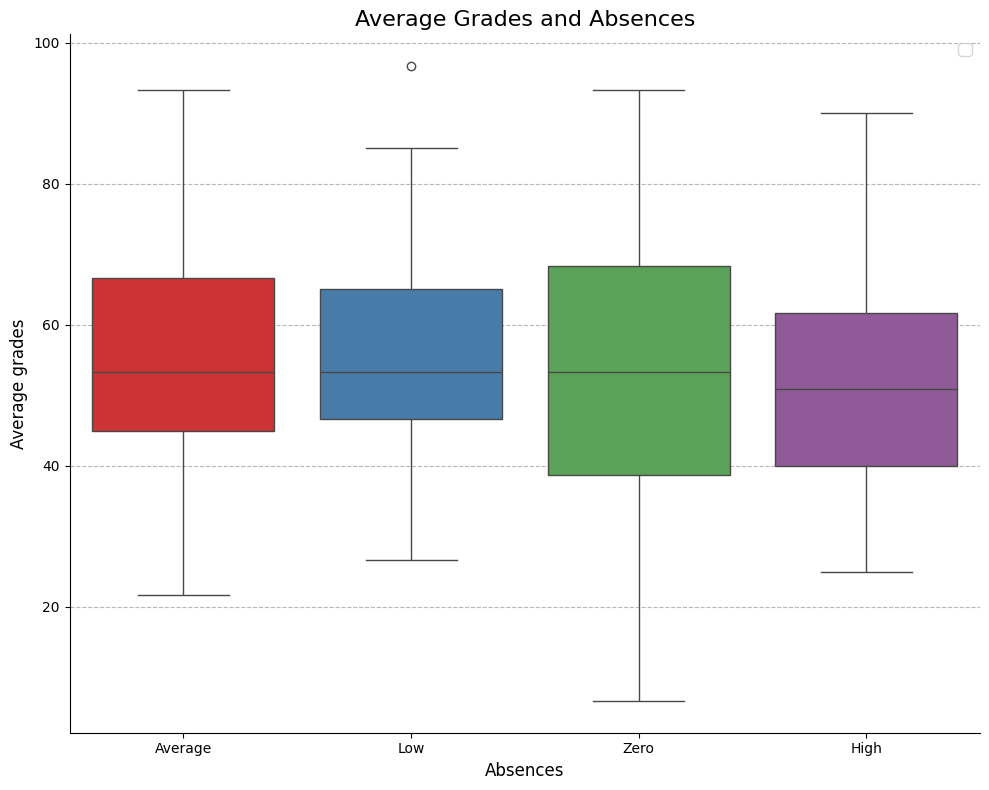

In [32]:
plt.figure(figsize=(10, 8))

sns.boxplot(data=student_df, x='absences_category', y='average_grade', palette='Set1')
plt.xlabel('Absences', fontsize=12)
plt.ylabel('Average grades', fontsize=12)
plt.legend(fontsize=12)
plt.title('Average Grades and Absences', fontsize=16)

sns.despine()
# Grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.tight_layout()
plt.show()

## Observations on Average grades and absences:

It is pretty clear that that students who are categoriezed as high absence tend to earned lower grades on average compared to the rest of their peers.  

In [33]:
student_df['absences_category'].value_counts()

absences_category
Zero       182
Average     85
High        64
Low         59
Name: count, dtype: int64

In [46]:
grades_abences = student_df.groupby('absences_category')[['G1', 'G2', 'G3']].mean()

print(grades_abences)

                          G1         G2         G3
absences_category                                 
Average            55.352941  55.235294  57.058824
High               53.203125  51.015625  51.015625
Low                54.322034  55.847458  56.610169


## Observations on abences and fail rate:

### failures = number of past class failures (numeric: n if 1<=n<3, else 4)

In [37]:
student_df['failures'].value_counts()

failures
0    311
1     50
2     15
3     14
Name: count, dtype: int64

In [38]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                390 non-null    object 
 1   age                390 non-null    int64  
 2   address            390 non-null    object 
 3   famsize            390 non-null    object 
 4   Pstatus            390 non-null    object 
 5   Medu               390 non-null    int64  
 6   Fedu               390 non-null    int64  
 7   Mjob               390 non-null    object 
 8   Fjob               390 non-null    object 
 9   reason             390 non-null    object 
 10  guardian           390 non-null    object 
 11  traveltime         390 non-null    int64  
 12  studytime          390 non-null    int64  
 13  failures           390 non-null    int64  
 14  schoolsup          390 non-null    object 
 15  famsup             390 non-null    object 
 16  paid               390 non

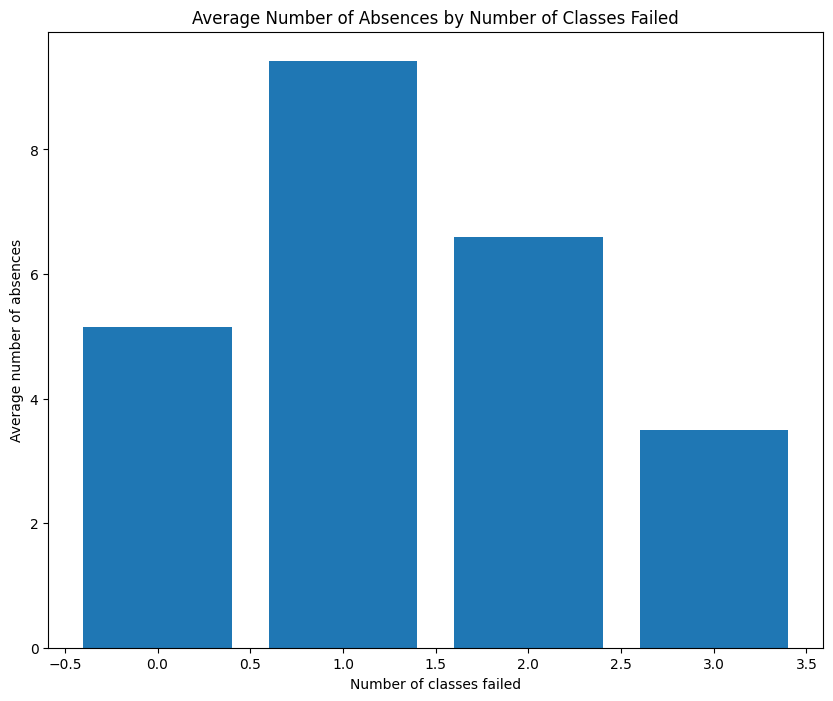

In [49]:
absences_failures = student_df.groupby('failures')['absences'].mean() #group by number of classes failed and average absences

plt.figure(figsize=(10,8))
plt.bar(absences_failures.index, absences_failures.values)

plt.xlabel('Number of classes failed')
plt.ylabel('Average number of absences')

plt.title('Average Number of Absences by Number of Classes Failed')

plt.show()